<a href="https://colab.research.google.com/github/Riturajseal2001/MobilePricePredictor/blob/master/PricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

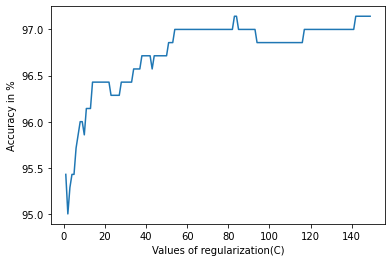

Accuracy of trained model in %:  97.14285714285714


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
X = df[:].drop(['price_range'], axis=1)
y = df['price_range']
df1 = pd.read_csv('test.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.65)
from sklearn.svm import SVC
acc = 0 
i1 = 0
output = []
acc_list = []
C_list = []
inp = df1.drop(['id'], axis=1)
for i in range(1,150):
    model = SVC(C = i,kernel='poly',break_ties=True)
    model.fit(X_train,y_train)
    if acc < model.score(X_test,y_test)*100:
        acc = model.score(X_test,y_test)*100
        i1 = i
        df1['predicted_price'] = model.predict(inp)
    acc_list.append(model.score(X_test,y_test)*100)
    C_list.append(i)
plt.ylabel('Accuracy in %')
plt.xlabel('Values of regularization(C)')
plt.plot(C_list,acc_list)
plt.show()
df1.to_csv('output.csv')
print("Accuracy of trained model in %: ",acc)